# Microsofts's New Movie Studio

## Overview
### Problem 
- Okay, so Microsoft sees other big companies making cool video content and wants to join in. They're starting their own movie studio, but they're clueless about making movies. That's where I come in. I have to find out which types of films are doing well at the box office and translate that into actionable insights for the head of Microsoft's studio. This will help them decide what kind of films to create.
### Data Understanding 
- The data I have available to me come from a variety of movie databases.
- The data represents various movie attributes. Key among them being revenue generated, popularity and ratings which will serve as our success metrics in this analysis.
#### Questions to consider
- Does expensive mean successfull?
- Is studio important to success?
- Are some genres more successful than others?

In [96]:
# import relevant modules
import pandas as pd
import numpy as np
from scipy import stats
from decimal import Decimal

# visulization modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### Data Preparation
- Get a better representation of user rating
- Fixing genre column in title.basics.csv
- Fix budget & revenue columns in tn.movie_budgets.csv

#### Getting a better representaion of user rating
- I doesn't seem fair to compare films with an avergae rating of 4 with only 100 voters to that with 4 and 10,000 voters.
- I will be using a method inspired by Bayesian probablity to  give a better representation of the rating.
- More information on how this works can be found  [here](https://stackoverflow.com/a/50476254)

In [2]:
# load the data
ratings_df = pd.read_csv('data/title.ratings.csv')

In [5]:
# Define the parameter R as the median of the averagerating column
R = np.median(ratings_df['averagerating'])

# Calculate the z-score for the 95% confidence level
z = stats.norm.ppf(0.975)

# Calculate W as z^2/4
W = z**2/4

# Calculate the Bayesian rating using the formula
ratings_df["bayesian_rating"] = (W * R + ratings_df["averagerating"] * ratings_df["numvotes"]) / (W + ratings_df["numvotes"])

# preview first 5 rows of the dataframe
ratings_df.head()


,tconst,averagerating,numvotes,bayesian_rating
0,tt10356526,8.3,31,8.245912
1,tt10384606,8.9,559,8.895884
2,tt1042974,6.4,20,6.404582
3,tt1043726,4.2,50352,4.200044
4,tt1060240,6.5,21,6.500000


#### Fixing genre column
- convert items in genre column to a list

In [8]:
# load the dat
basics_df = pd.read_csv('data/title.basics.csv')

In [10]:
txt = 'Hello'
[txt]

['Hello']

In [16]:
def text_to_list(text):
    # what to do if text is empty or not a string type
    if text == '' or type(text) != str:
        return np.nan
    # check if text has a comma
    elif ',' in text:
        return text.split(',')
    # what to do is text has no comma
    else:
        return [text]

In [17]:
# apply text_to_list to genres column
basics_df.loc[:, 'genres'] = basics_df['genres'].apply(text_to_list)

In [18]:
# previe results
basics_df['genres']

0           [Action, Crime, Drama]
1               [Biography, Drama]
2                          [Drama]
3                  [Comedy, Drama]
4         [Comedy, Drama, Fantasy]
                    ...           
146139                     [Drama]
146140               [Documentary]
146141                    [Comedy]
146142                         NaN
146143               [Documentary]
Name: genres, Length: 146144, dtype: object

#### Fixing budget and revenue

In [32]:
# function to change currency to numeric data type
def dollar_to_numeric(dollar):
    # check if the value is NaN
    if pd.isna(dollar):
        # return NaN as it is
        return dollar
    # otherwise, strip the dollar sign and replace commas with empty strings
    dollar = dollar.strip('$').replace(',', '')
    # convert the string to a Decimal object
    numeric = Decimal(dollar)
    # return the numeric value
    return float(numeric)

In [44]:
# read csv file
budgets_df = pd.read_csv('data/tn.movie_budgets.csv')

# apply function to production_budget column
budgets_df.loc[:, 'production_budget'] = budgets_df['production_budget'].apply(dollar_to_numeric)

# apply function to domestic_gross column
budgets_df.loc[:, 'domestic_gross'] = budgets_df['domestic_gross'].apply(dollar_to_numeric)

# apply function to worldwide_gross column
budgets_df.loc[:, 'worldwide_gross'] = budgets_df['worldwide_gross'].apply(dollar_to_numeric)

# preview first 5 rows
budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747.0


In [45]:
# change dtype of production_budget, domestic_gross and worldwide_gross to numeric
budgets_df['production_budget'] = pd.to_numeric(budgets_df['production_budget'], errors='coerce')
budgets_df['domestic_gross'] = pd.to_numeric(budgets_df['domestic_gross'], errors='coerce')
budgets_df['worldwide_gross'] = pd.to_numeric(budgets_df['worldwide_gross'], errors='coerce')

### Data Analysis

#### Does Expensive mean successfull?
##### Questions to answer?
- Do more expensive films get better ratings?
- Do more expensive films make more profit?
##### Conclusions?
- Budget and rating have a low positive linear relationship. Therfore it seems that more expensive films don't always result in a good reception by the audience. It should be noted that majority of the highest rated films have a high budget. So maybe if you aren't so sure about how your film will be recieved making more expensive won't increase you chances of a positive reception.
- Budget and profit have moderate positive linear relationship. It seems that more expesive films make more profit but doesn't mean that expensive films are more profitable. This could mean that spending more on the cast or visual effects leads to more profit but at the moment with the data with have we cannot claim that to be 100% true.

##### Budget vs. Rating

In [46]:
# create mapper to rename columns
new_names = {'movie': 'title',
             'worldwide_gross': 'revenue',
             'production_budget': 'budget'}

# rename columns
budgets_df.rename(columns=new_names, inplace=True)

In [47]:
# read csv file for movie title
title_df = pd.read_csv('data/title.basics.csv', usecols=['tconst', 'primary_title'])

# crate mapper to rename column
new_name = {'primary_title': 'title'}

# rename column
title_df.rename(columns=new_name, inplace=True)

In [48]:
# inner join ratings_df with title_df on tconst column
ratings_with_title = ratings_df.merge(right=title_df, on='tconst', how='inner')

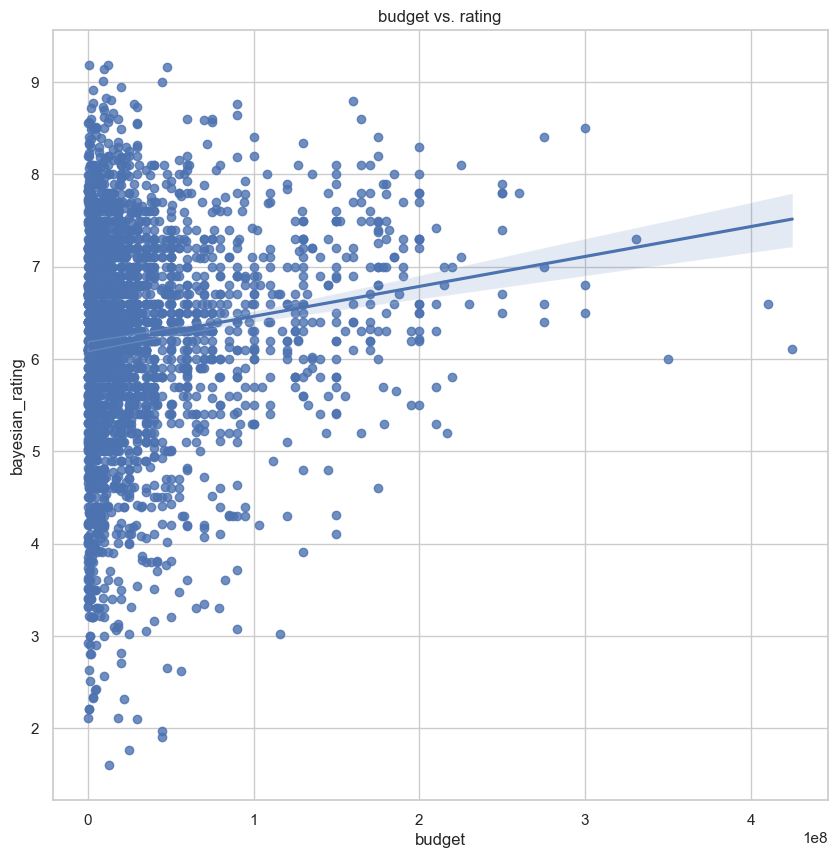

In [97]:
# create matplotlib figure and ax
fig, ax = plt.subplots(figsize=(10, 10))

# specify axis
x_axis = 'budget'
y_axis = 'bayesian_rating'

# plot an sns regplot
plot = sns.regplot(x=x_axis, y=y_axis, data=ratings_with_title.merge(right=budgets_df, on='title', how='inner'), ax=ax)

# set title
ax.set_title('budget vs. rating')

# show the plot
plt.show()

In [54]:
_ = ratings_with_title.merge(right=budgets_df, on='title', how='inner')
# Calculate correlation coefficient between bayesian_rating and budget
correlation = round(stats.pearsonr(_['bayesian_rating'], _['budget'])[0], 2)
print(correlation)

0.13


##### Budget vs. Profit

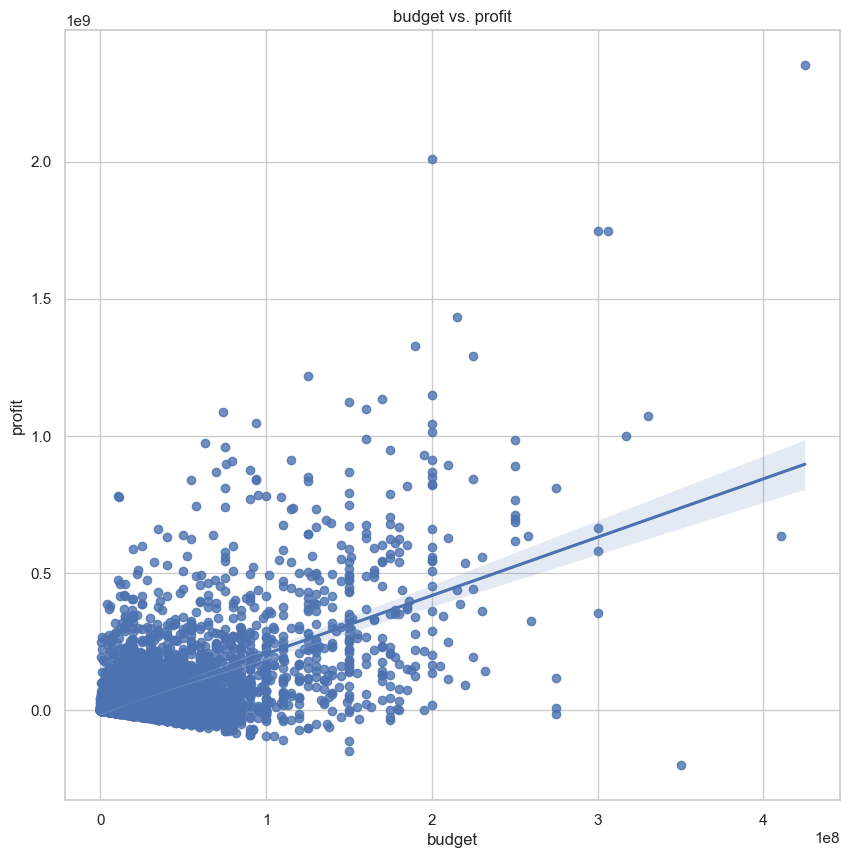

In [98]:
# create matplotlib figure and ax
fig, ax = plt.subplots(figsize=(10, 10))

# specify axis
x_axis = budgets_df['budget']
y_axis = budgets_df['revenue'] - budgets_df['budget']

# plot an sns regplot
plot = sns.regplot(x=x_axis, y=y_axis, ax=ax)

# set title
ax.set_title('budget vs. profit')

# set y-axis
ax.set_ylabel('profit')

# show the plot
plt.show()

In [68]:
# Calculate correlation coefficient between bayesian_rating and budget
correlation = round(stats.pearsonr(y_axis, x_axis)[0], 2)
print(correlation)

0.61


#### Are some genres more successful than others
##### Conclusion: Yes, some genres are more successful than others. And the trend as stayed consistent since 2018
- Yes the genres with the most investment are more profitable. The top 5 most expensive genres are also the top 5 most profitable genres.
- The genres with the least investment are also the least profitable. The least expensive genres are also the least profitable genres.
- A reason for this might be because of the wide appeal of these genres, esspecially animation and adventure.
- The type of genre doesn't really seem to influence the rating of the film as most of them as clustered around 6 - 7


##### Genre vs. Revenue

In [202]:
# mapper for new column name
new_name = {'primary_title': 'title'}

# rename column 
basics_df.rename(columns=new_name, inplace=True)

In [203]:
# specify columns to use
usecols = ['genres', 'budget', 'revenue']

# inner merge budgets_df with basics_df on title column
genres_and_budget = basics_df.merge(right=budgets_df, on='title', how='inner')[usecols]

In [204]:
# drop rows where the genres column is NaN
genres_and_budget.dropna(subset=['genres'], axis=0, inplace=True)

In [205]:
# Create a list to store expnaded rows
expanded_rows = []

# Expand basics_df by creating new rows for each genre
for _, row in genres_and_budget.iterrows():
    genres = row['genres']
    revenue = row['revenue']
    budget = row['budget']
    for genre in genres:
        expanded_rows.append({'genre': genre.strip(), 'revenue': revenue, 'budget': budget})

# Create a new DataFrame from the list of expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Group  by genre and calculate the mean 
genre_revenue = expanded_df.groupby('genre').mean()

# reset index
genre_revenue = genre_revenue.reset_index()

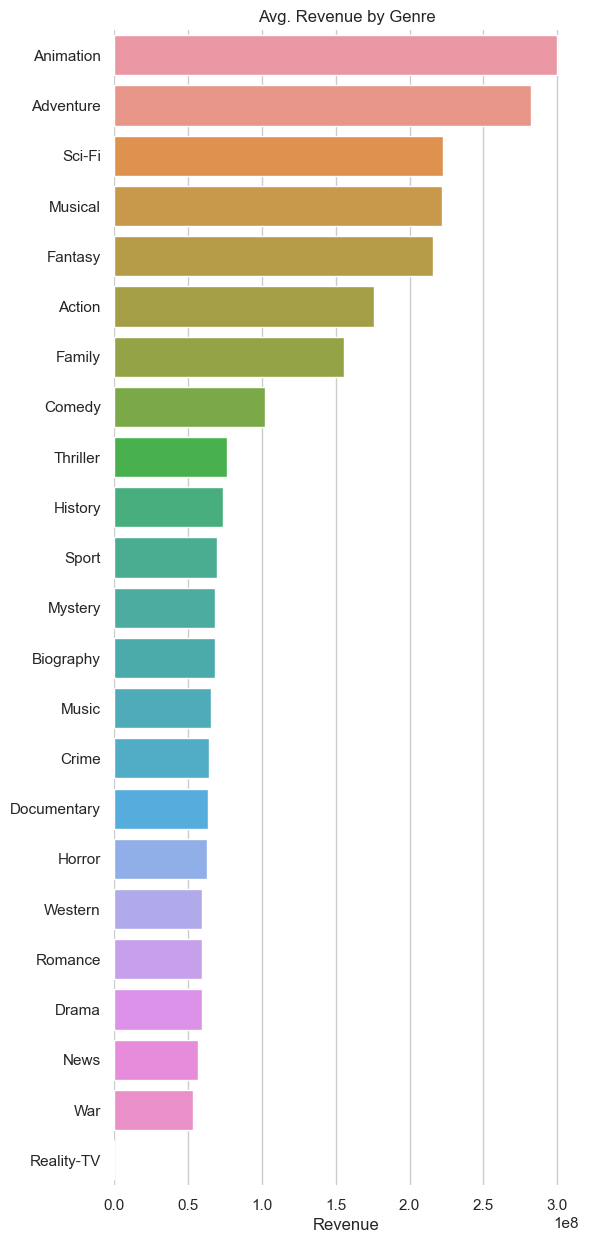

In [208]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the revenue by genre
sns.barplot(x='revenue', y='genre', data=genre_revenue.sort_values(by=['revenue'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Revenue', title='Avg. Revenue by Genre')
sns.despine(left=True, bottom=True)

##### Genre vs. Budget

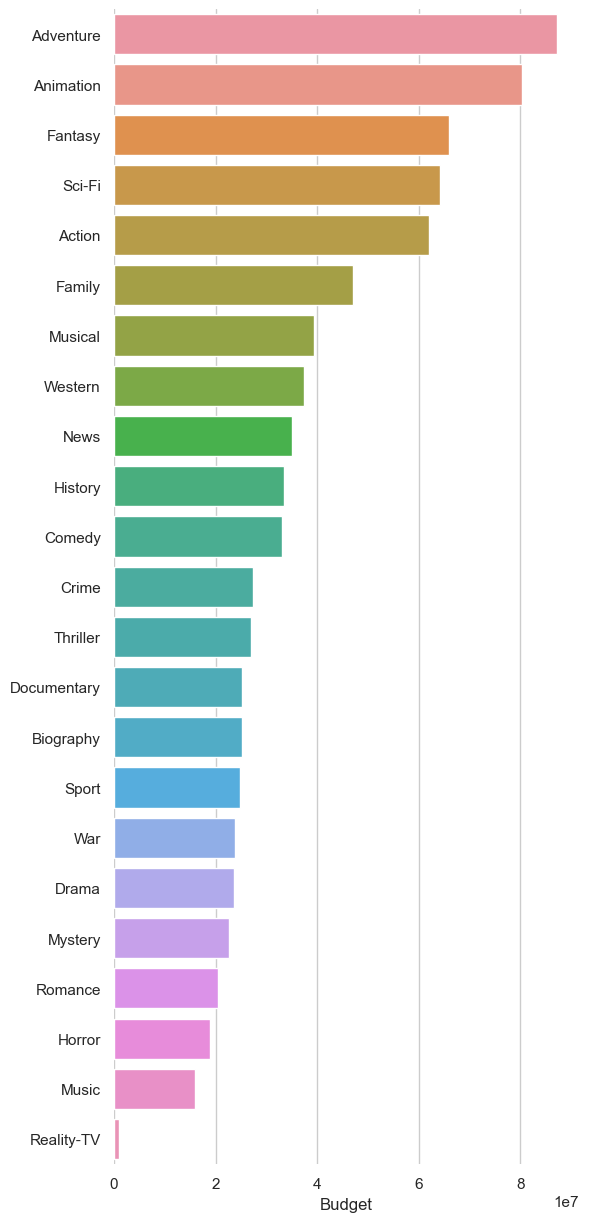

In [123]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the revenue by genre
sns.barplot(x='budget', y='genre', data=genre_revenue.sort_values(by=['budget'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Budget')
sns.despine(left=True, bottom=True)

##### Genre vs. Profit

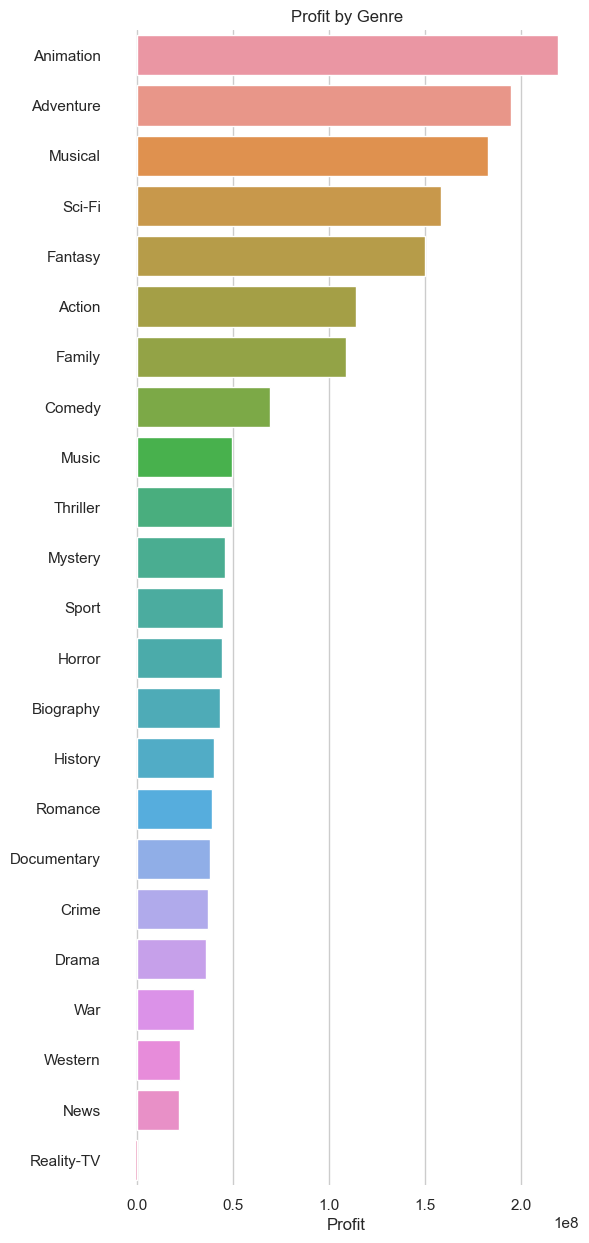

In [207]:
genre_revenue['profit'] = genre_revenue['revenue'] - genre_revenue['budget']

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the profit by genre
sns.barplot(x='profit', y='genre', data=genre_revenue.sort_values(by=['profit'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Profit', title='Profit by Genre')
sns.despine(left=True, bottom=True)

##### Genres vs. Popularity

In [214]:
# specify columns to use
usecols = ['genres', 'bayesian_rating']

# merge basics_df and ratings_df on the tconst column using an inner join
# and save the result to basics_ratings_df
basics_ratings_df = basics_df.merge(ratings_df, on='tconst', how='inner')[usecols]

# drop rows where the genres column is NaN
basics_ratings_df.dropna(subset=['genres'], axis=0, inplace=True)

In [215]:
# Create a list to store expnaded rows
expanded_rows = []

# Expand basics_ratings_df by creating new rows for each genre
for _, row in basics_ratings_df.iterrows():
    genres = row['genres']
    rating = row['bayesian_rating']
    for genre in genres:
        expanded_rows.append({'genre': genre.strip(), 'rating': rating})

# Create a new DataFrame from the list of expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Group  by genre and calculate the mean 
genre_rating = expanded_df.groupby('genre').mean()

# reset index
genre_rating = genre_rating.reset_index()

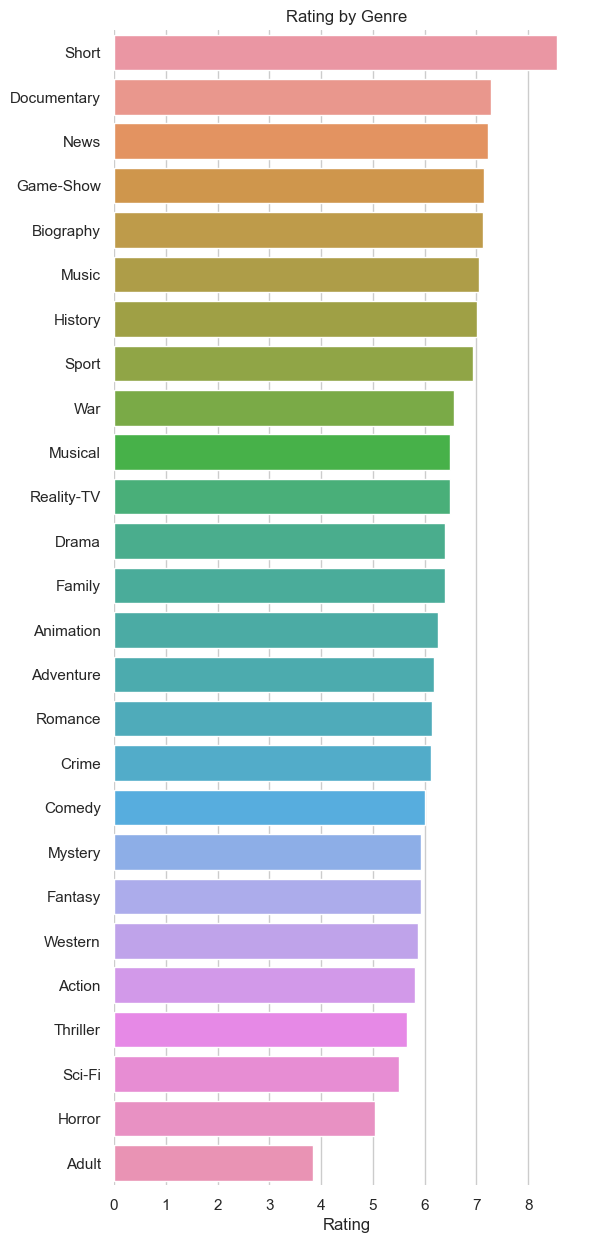

In [216]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the bayesian_rating by genre
sns.barplot(x='rating', y='genre', data=genre_rating.sort_values(by=['rating'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Rating', title='Rating by Genre')
sns.despine(left=True, bottom=True)

##### Are these trends still true for the past 5 years? Yes

###### Revenue since 2018

In [195]:
# specify columns to use
usecols = ['genres', 'budget', 'revenue']

# inner merge budgets_df with basics_df on title column
genres_and_budget = basics_df[basics_df['start_year'] >= 2018].merge(right=budgets_df, on='title', how='inner')[usecols] # only select films produced since 2018

In [197]:
# drop rows where the genres column is NaN
genres_and_budget.dropna(subset=['genres'], axis=0, inplace=True)

In [198]:
# Create a list to store expnaded rows
expanded_rows = []

# Expand basics_df by creating new rows for each genre
for _, row in genres_and_budget.iterrows():
    genres = row['genres']
    revenue = row['revenue']
    budget = row['budget']
    for genre in genres:
        expanded_rows.append({'genre': genre.strip(), 'revenue': revenue, 'budget': budget})

# Create a new DataFrame from the list of expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Group  by genre and calculate the mean 
genre_revenue = expanded_df.groupby('genre').mean()

# reset index
genre_revenue = genre_revenue.reset_index()

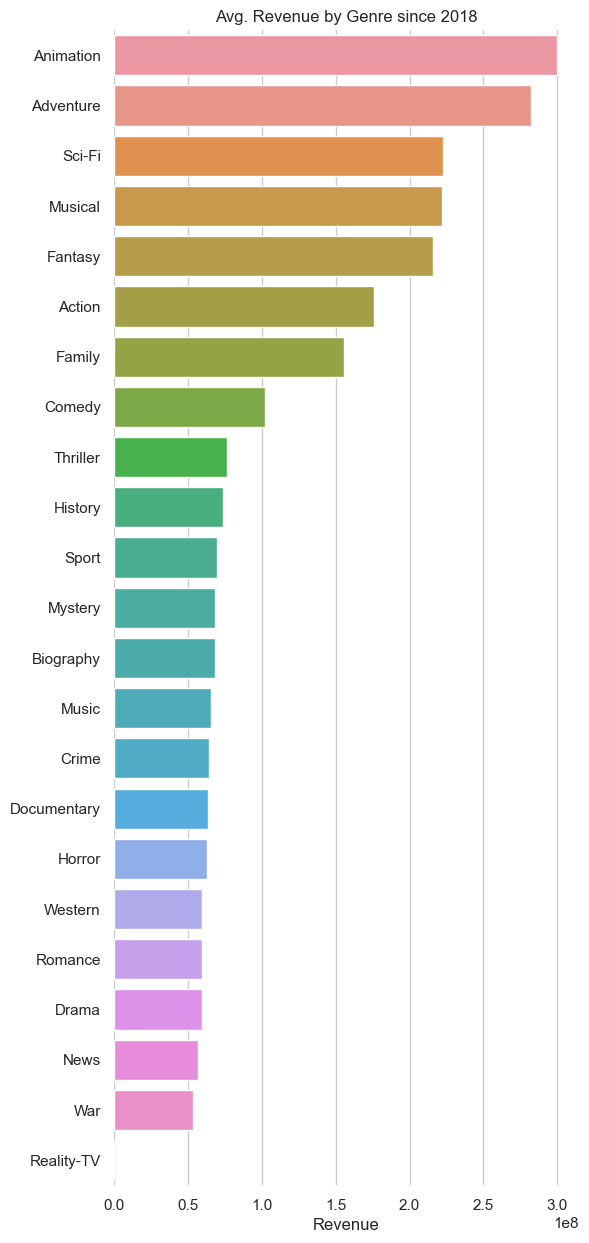

In [209]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the revenue by genre
sns.barplot(x='revenue', y='genre', data=genre_revenue.sort_values(by=['revenue'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Revenue', title='Avg. Revenue by Genre since 2018')
sns.despine(left=True, bottom=True)

###### Ratings since 2018

In [217]:
# specify columns to use
usecols = ['genres', 'bayesian_rating']

# merge basics_df and ratings_df on the tconst column using an inner join
# and save the result to basics_ratings_df
basics_ratings_df = basics_df[basics_df['start_year'] >= 2018].merge(ratings_df, on='tconst', how='inner')[usecols] # only since 2018

# drop rows where the genres column is NaN
basics_ratings_df.dropna(subset=['genres'], axis=0, inplace=True)

In [218]:
# Create a list to store expnaded rows
expanded_rows = []

# Expand basics_ratings_df by creating new rows for each genre
for _, row in basics_ratings_df.iterrows():
    genres = row['genres']
    rating = row['bayesian_rating']
    for genre in genres:
        expanded_rows.append({'genre': genre.strip(), 'rating': rating})

# Create a new DataFrame from the list of expanded rows
expanded_df = pd.DataFrame(expanded_rows)

# Group  by genre and calculate the mean 
genre_rating = expanded_df.groupby('genre').mean()

# reset index
genre_rating = genre_rating.reset_index()

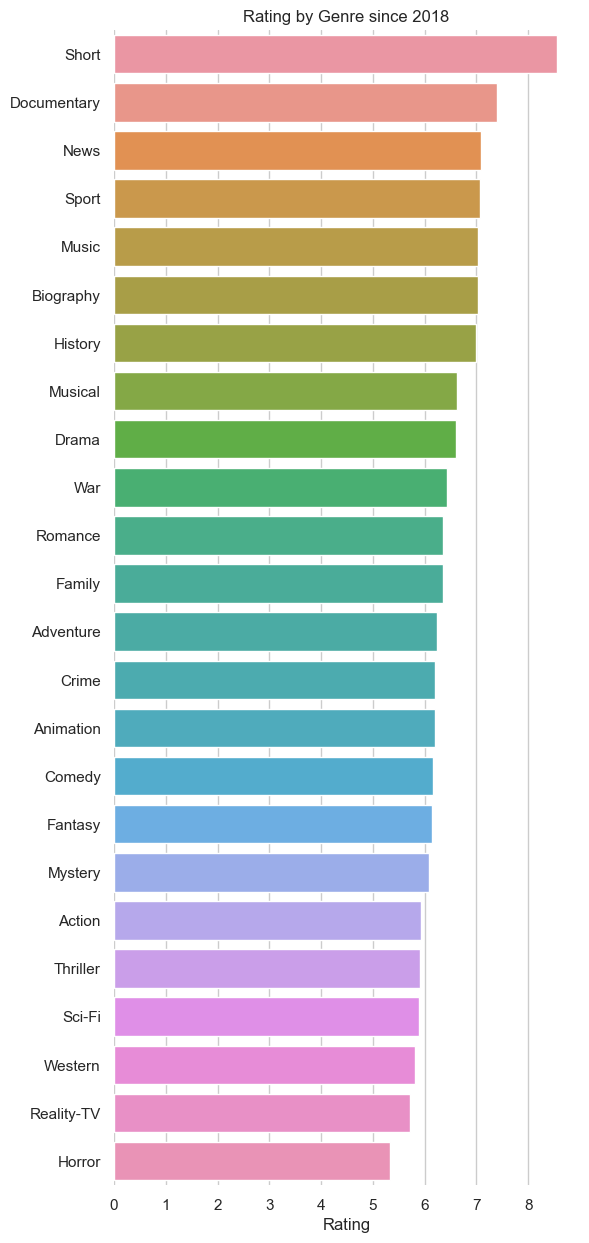

In [219]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the bayesian_rating by genre
sns.barplot(x='rating', y='genre', data=genre_rating.sort_values(by=['rating'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Rating', title='Rating by Genre since 2018')
sns.despine(left=True, bottom=True)

#### Do production studio's influence the success of a film?
##### Conclusion:
- Studio success, at least in terms of revenue and profit, seems to be influenced by what budget they have.
- As we saw with the other features (genre and budget), user rating doesn't seem to follow ay particular trend.

##### Revenue per studio

In [132]:
# read csv file
studio_df = pd.read_csv('data/bom.movie_gross.csv', usecols=['title', 'studio'])

In [164]:
# specify columns to use
usecols = ['title', 'studio', 'budget', 'revenue']

# merge studio_df and budgets_df
studio_budgets = studio_df.merge(right=budgets_df, on='title', how='inner')[usecols]

# add profit column to studio_budgets
studio_budgets['profit'] = studio_budgets['revenue'] - studio_budgets['budget']

In [165]:
# Group  by studio 
_ = studio_budgets.groupby('studio').agg(appearances=('studio', 'size'),
                                         revenue=('revenue','mean'),
                                         budget = ('budget', 'mean'),
                                         profit = ('profit', 'mean'))

# reset index
_ = _.reset_index()

# select top 20 studio's by appearance
top_20 = _['appearances'].nlargest(20).index
_ = _[_.index.isin(top_20)]


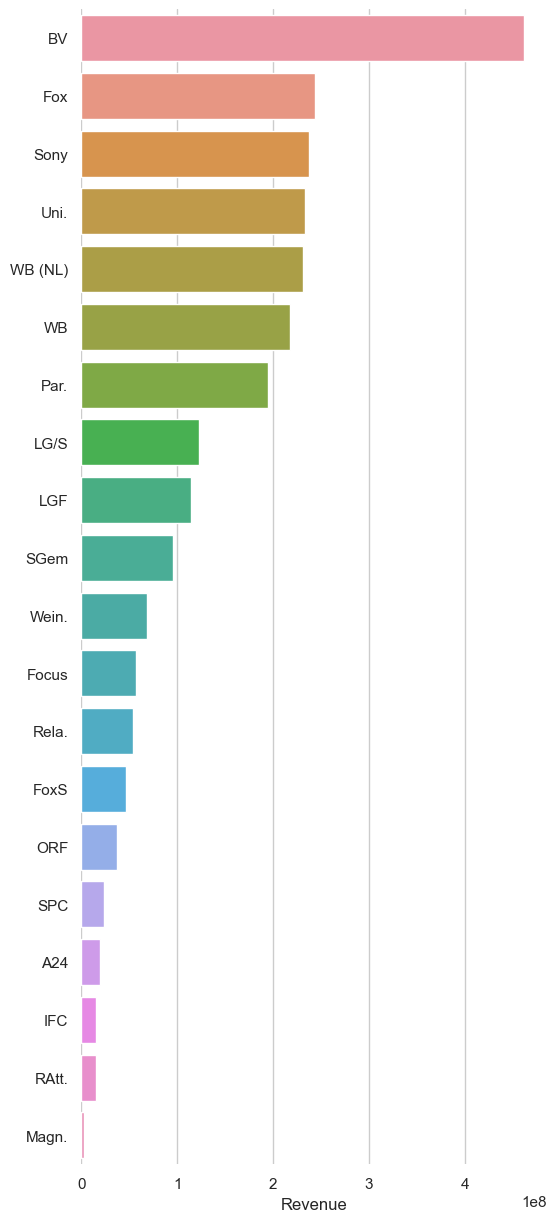

In [166]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the revenue by top 20 studios
sns.barplot(x='revenue', y='studio', data=_.sort_values(by=['revenue'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Revenue')
sns.despine(left=True, bottom=True)

##### Budget per Studio

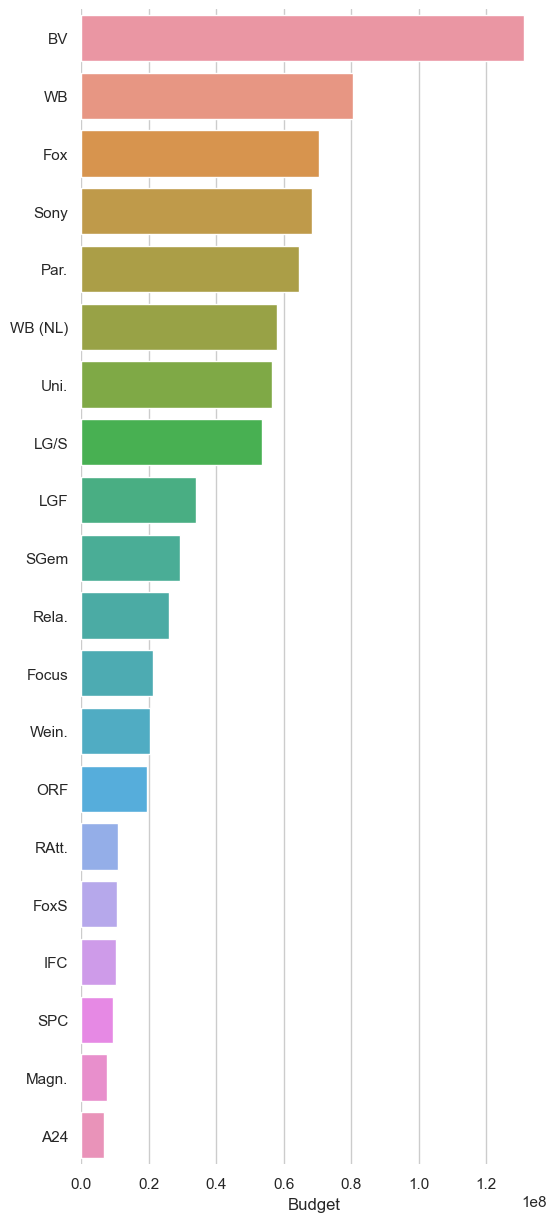

In [168]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the budget by top 20 studios
sns.barplot(x='budget', y='studio', data=_.sort_values(by=['budget'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Budget')
sns.despine(left=True, bottom=True)

##### Budget per Studio

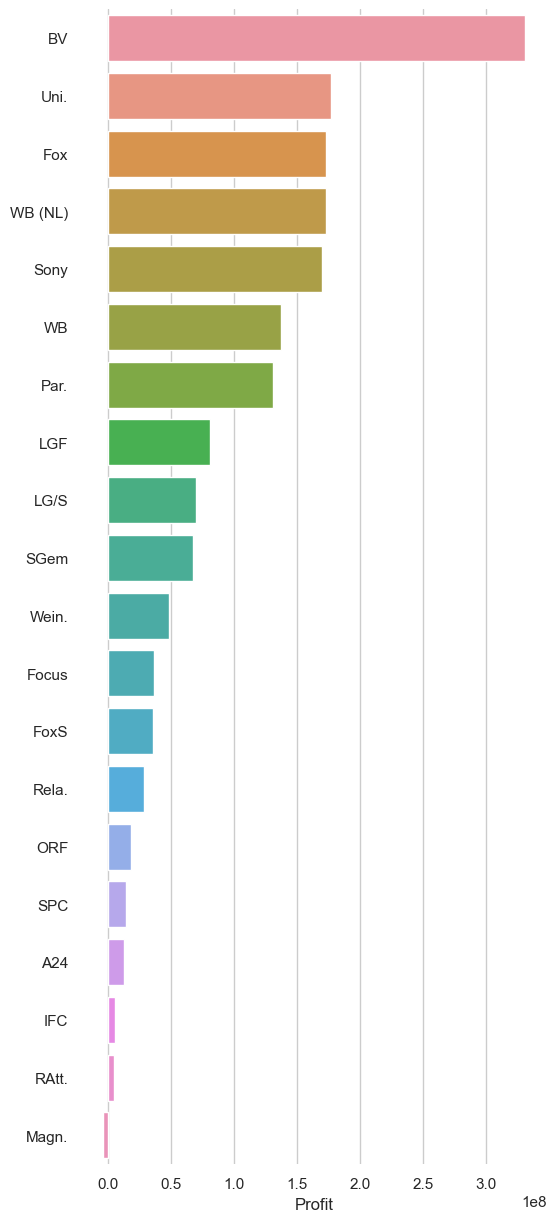

In [169]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the budget by top 20 studios
sns.barplot(x='profit', y='studio', data=_.sort_values(by=['profit'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Profit')
sns.despine(left=True, bottom=True)

##### Rating per Studio

In [170]:
# specify columns
usecols = ['studio', 'bayesian_rating']
# inner merge studio_budgets with ratings_with_title on title column
studio_ratings = studio_budgets.merge(ratings_with_title, on='title', how='inner')[usecols]

In [171]:
# Group  by studio 
_ = studio_ratings.groupby('studio').agg(appearances=('studio', 'size'),
                                         bayesian_rating =('bayesian_rating','mean'))

# reset index
_ = _.reset_index()

# select top 20 studio's by appearance
top_20 = _['appearances'].nlargest(20).index
_ = _[_.index.isin(top_20)]

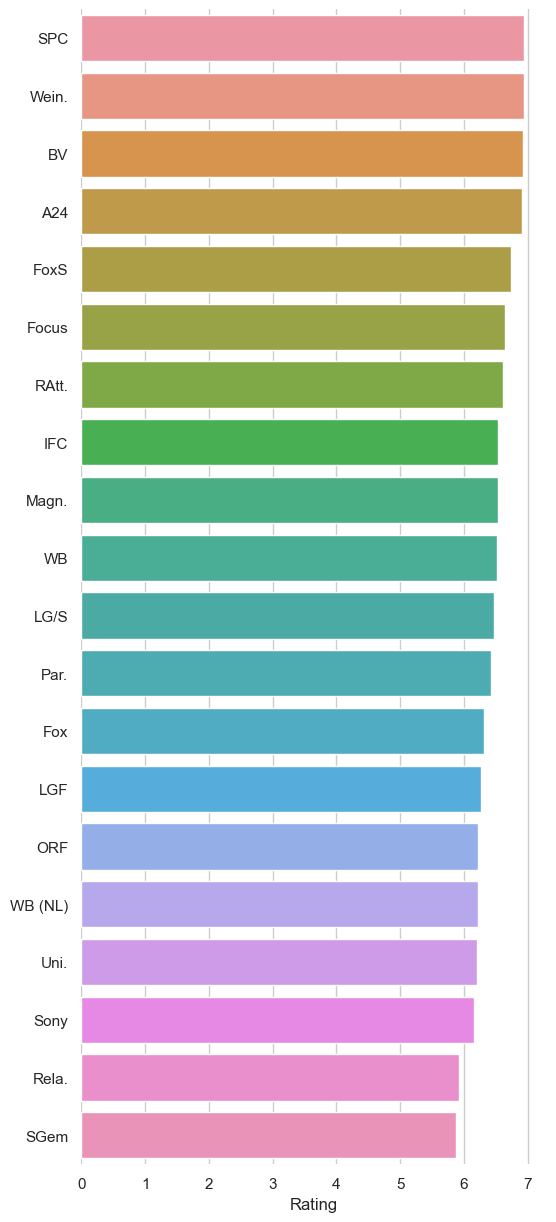

In [172]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the budget by top 20 studios
sns.barplot(x='bayesian_rating', y='studio', data=_.sort_values(by=['bayesian_rating'], ascending=False), ax=ax)

# Add informative axis label
ax.set(ylabel='', xlabel='Rating')
sns.despine(left=True, bottom=True)

### Recommendations:
1. Diversify Film Budgets: While budget does have some impact on a film's success, it is not a guarantee of high ratings or profitability. It is recommended to diversify the film budgets and not solely rely on expensive productions. Microsoft should consider a mix of high-budget and moderate-budget films based on the genre, target audience, and expected reception.
2. Focus on Profitable Genres: The analysis suggests that certain genres, such as animation and adventure, tend to be more profitable. Microsoft should prioritize these genres in their film production strategy. However, it is also important to consider market trends, audience preferences, and competition within each genre to create unique and engaging content.
3. Invest in Popular Genres: As the analysis indicates, genres with higher investment tend to be more profitable. Microsoft should allocate resources to genres that have proven to be successful in terms of box office revenue. However, careful consideration should be given to balancing investment with market demand and audience preferences to ensure a positive return on investment.
4. Emphasize Audience Appeal: While the rating of a film is not significantly influenced by its genre, it is crucial to focus on creating content that appeals to a wide audience. Conduct market research and audience segmentation to understand the target demographic's preferences, interests, and trends. This will help Microsoft tailor their films to meet the expectations and needs of their target audience, increasing the chances of success.
5. Collaborate with Established Studios: The analysis suggests that studio success in terms of revenue and profit is influenced by budget. Microsoft's movie studio can consider collaborating with established production studios that have a track record of success in the film industry. This collaboration can provide valuable expertise, resources, and distribution channels to enhance the chances of success for Microsoft's films.
6. Continuous Monitoring of Industry Trends: The film industry is constantly evolving, and trends can shift quickly. It is recommended for Microsoft to stay updated on market trends, emerging genres, and audience preferences through regular market research and monitoring of industry reports. This will enable them to adapt their film production strategy accordingly and stay competitive in the market.